# A pipeline for Bayesian inference on seizure propagation seen in  sEEG data

In this notebook report, we present a systematic workflow in order to fit brain model parameters (in this study, a 2D reduction of coupled Epileptors) to the functional data such as stereotactic EEG (sEEG).

To achieve this goal, we need to define:

a) the brain network model including the parameters of interest i.e., the generative model. 

b) the fitting target such as the sEEG time series i.e, the observation.  

c) Bayesian inference framework to fit the brain model against the patient's empirical data. 



## Bayesian inference:

Bayesian approach offers a framework to deal with parameters and model uncertainty. It offers much more than a single best fit obtained within Frequentist approach.

In current study, our aim is to obtain the estimates of the excitability parameters of the brain model defined by network of reduced Epileptor model (Proix et al., 2014), given the individualized patient's empirical sEEG,  within a Bayesian framework.  

For the current perpose, we have a large set of emperical data,  and a complex mathematical model compressing neural mass models on each network node connected via patient's connectome.  Consequently, we need a complex inference framework to achieve reliable estimates. This task arises this critical technical question that how we can tackle down such a complicated challenge in parameter estimation problems (known as inverse problem)? In other words, how we can implement a Parameter Estimation Framework in order to fit large-scale brain network models against signals from the imaging modality such as sEEG? Which programming software and which algorithm are required to address this challenge?   The answer is Probabilistic Programming (automated inference). We first define the generative model as well as the fitting target, and then we run a Bayesian algorithm to estimate the parameters of interest. It is important to note that deriving Bayesian inference algorithms requires tedious model-specific calculations: choosing a proper setup for the algorithm, tune its parameter values to improve the algorithm efficiency, initializing, computational efficiency of the code, and more importantly a generic framework which allows us to automatically fit personalized brain network models derived from non-invasive structural data of individual patients.


#### Algorithms for Bayesian inference

According to our investigations for some case studies, the following recently developed algorithms are able to solve complex inference probability problems:
- Hamiltonian Mote Calro (HMC)
- Variational Inference (VI).

HMC takes advantage of gradient information from the likelihood to achieve much faster convergence than traditional sampling methods (such as Metropolis and Gibbs sampling), especially for larger data set. 
The performance of HMC depends strongly on choosing suitable values for: step size and total integration time.
A poor choice of either of these parameters will result in a dramatic drop in HMC’s efficiency. To remedy this shortcoming, a recently developed algorithm known as No-U-Turn Sampler (NUTS) have been used (Hoffman and Gelman 2014).  This algorithm is an extension to HMC, with no hand-tuning at all!


The other way to estimate parameters within Bayesian framework is  Variational Inference (VI). VI approximates the posterior with a simpler distribution.   We posit a family of distributions and find the member closest to the posterior (the member of  the family that minimizes the Kullback-Leibler (KL) divergence to the exact posterior). 
This turns the task of computing a posterior into an optimization problem. 


Traditionally, using a variational inference algorithm requires the painstaking work of:
developing and implementing a custom optimization routine, specifying a variational family appropriate to the model, 
computing the corresponding objective function,  taking derivatives, and running a gradient-based or coordinate-ascent optimization.  Atomatic Differentiation Variational Inference (ADVI) solves these problems systematically.  The user specifies the model, expressed as a program code, and ADVI automatically generates a corresponding variational algorithm. Note that ADVI supports a broad class of models, and enables fast inference with a large data set compared to HMC. 


#### Softwares for Bayesian inference

Both Bayesian algorithms described above are provided in Satn (Open-source framework for Bayesian inference) without the hand-tuning the algorithm's parametrs for different case studies.  Stan resolves the computational bottleneck of the probabilistic modeling cycle. This software is a flexible probabilistic programming system which allows of Bayesian statistical models in code (Probabilistic Programming). Stan describes a high-level language to define probabilistic models as well as a model compiler, a library of transformations, and an efficient automatic differentiation toolbox.  Stan uses two step complication process: the user writes a model in pure Stan code which is then translated to C++ by Stanc compiler. 

Note that there exist many other Probabilistic Programming (PP) allowing flexible specification of Bayesian statistical models in code- PYMC, PYMC3, Edward, WinBUGS to name a few. For instance, PyMC3 is a new open source probabilistic programming framework written in Python that uses Theano to compute gradients via automatic differentiation (https://pymc-devs.github.io/pymc3/notebooks/getting_started.html).
Contrary to other probabilistic programming languages, PyMC3 allows model specification directly in Python code. 
Although there is "No free lunch" and choosing one of the Bayesian Software comes with the trade-off between model coding language, the level of documentation  and the provided libraries, Stan is the major open-source framework for Bayesian inference within statisticians community. For a more detailed discussion on tradeoff between mentioned softwares please see http://andrewgelman.com/2015/10/15/whats-the-one-thing-you-have-to-know-about-pystan-and-pymc-click-here-to-find-out/.

According to our experiences, we have chosen Stan as an Open-source framework to implement NUTS (an extension to HMC) and ADVI (automatic variational inference) Bayesian inference.  Certainly, one can use PYMC3 or the other Probabilistic Programming Softwares though we recommend use of Stan due its several advantages against the other alternatives. 

Finally, it is worth pointing out that in none of the existed Probabilistic Programming Softwares within Bayesian framework, no solver was provided into the code to integrate the stochastic differential equations. Thus, we have to solve and integrate the equations ourselves (using Euler-Maruyama method) and then we are able to call the VI or HMC algorithm to construct the posterior distributions. Only there exists solver for detereminsitic diferential equations in Stan. This more motivated us to use Stan in our work with the aim to solve deterministic version of the model using  in addition to the stochastic equations. In the following, more details on Stan software is presented.

 


###  Bayesian inference in Stan:


Stan® is freedom-respecting, open-source software for facilitating statistical inference, statistical modeling and high-performance statistical computation at the frontiers of applied statistics. 

Stan implements both Hamiltonian Monte-Carlo and automatic variational inference algorithms for generic differential probability models (The Stan Development Team, 2015).

Using Stan within different interfaces such as Python and shell, runing on all major platforms (Linux, Mac, Windows), we are able to perform:

- Bayesian statistical inference with the gradient-based MCMC sampling known as Hamiltonian Monte Carlo (HMC):
HMC takes advantage of gradient information to achieve much faster convergence than traditional sampling methods, and its trajectories do not resemble random-walks.


- approximate Bayesian inference using automatic differentiation variational inference (ADVI): 
an automatic method that derives variational inference algorithms for complex probabilistic models. ADVI searches over a family of simple distributions and find the member closest to the posterior. Compared to HMC, variational inference tends to be faster and easier to scale to large data.




For more details on the algorithms and Stan interfaces, see Stan homepage: 
[mc-stan.org](http://mc-stan.org/)


In this work, we use the python inference (PyStan) and we run the code in shell (cmdstan). 
For this purpose, we need to install PyStan (in Python) and CmdStan (shell, command-line terminal). 

To install PyStan, please see: 

https://pystan.readthedocs.io/en/latest/getting_started.html

To install CmdStan, unpack zip file CmdStan 2.16.0 from:

https://github.com/stan-dev 

and consult the user’s guide (in directory doc/) for installation and getting started instructions.



## Seizure propagation model:

Several studies have linked the interpretation of neuroimaging signals to computational brain models; the use of connectivity derived from Diffusion-weighted MRI (dMRI) to constrain large-scale brain network models.

VEP is based on personalized brain network models derived from non-invasive structural data of individual patients (Jirsa et al., NeuroImage 2016). Using patient-specific connectomes in large-scale brain networks as generative models of neuroimaging signals, we fit and validate the brain model against the patient's empirical stereotactic EEG (SEEG).

The approach to build the VEP brain model comprises :

-  Structural network modeling (reconstruction of the patient's individual brain network topography)
-  Functional network modeling (Epileptor are defined on each network node)
-  Hypothesis formulation (first hypotheses of the location of the Epileptogenic Zone)
-  Evaluation of the VEP brain model (simulation, data fitting and mathematical analysis). 
 
After the  preprosseing of the sEEG signal which is presented in this notebook, we fit the neural mass model of 2D reduction of coupled Epileptors, network connectivity & sEEG forward solution. The network dynamics follow Proix et al, Eq (2-6), 

$$
\begin{align}
  \dot{x}_{1, i} &= 1 - f_1(x_{1,i}) - z_i + I_{1, i} \\
  \tau_0 \dot{z}_i &= h(x_{1, i}) - z_i - k \sum_{j=1}^N K_{ij} (x_{1, j} - x_{1, i}) \\
\end{align}
$$

where their evolution follows a Euler-Maruyama discretization of the corresponding stochastic differential equations from time $t$ to $t + dt$, with linear additive normally distributed noise.


Constants and auxiliary functions are taken from  Proix et al. 2014, and the work flow pursueS the paper Jirsa et al. NeuroImage 2016. The target for all data fitting is the excitability parameter x0.
Obtaining such estimates of the parameters of the network model, given the available functional data is performed within a Bayesian framework, using a reduced Epileptor model and reduced functional data set for the fitting.



## Required empirical data:

To fit the brain model described above to processed sEEG signals i.e.,  to provide posterior distributions of excitability parameters on each node, we need the following data:
- Seizure time series (complex.npy)
- Structural connectivity matrix (weights.txt)
- Region centers (centers.txt)
- xyz position of electordes and their contacts (elecs_name.txt)
- ades file containing sampling rate, number of samples, and the contact labesl e.g., A'1, A'2, ..., TP'1  (complex.ades)
 
 
 
 
 
 In the following,  we load and preprocess sEEG data, sensors and connectivity, then build a dynamical model (Reduced Epileptor model following Proix et al, 2014) linking the data, and use Hamiltonian Monte Carlo and variational inference techniques as implemented by the Stan software. 
 
 Briefly, using the work flow presented here, we can obtain the posterior estimates of excitability parameter x0 of the described large-scale brain network model from sEEG signals. This work flow generally can be applied to fit brain model parameters to the functional data. 

# Contents

- [Setup](##Setup)
- [Plot region and electrode positions](##Plot region and electrode positions)
- [Load complex seizure](##Load complex seizure)
- [Plot time series](##Plot time series) 
- [Filter & decimate](##Filter & decimate)
- [Select the contacts](##Select the contacts)
- [Select the nodes](#Select the nodes)
- [Fitting target](#Fitting target)
- [Compile and Run](#Compile and Run)
- [Results](#Results)


# Setup

Here we import Numpy, Pylab, Matplotlib, SciPy's signal processing toolbox, the Mako templating library & Python interface to Stan (Pystan). Nibabel is used to handle some data. The HTML object lets us inline HTML in the notebook, e.g. displaying tables of data.

In [16]:
import os
import re
import sys
import numpy as np
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
import time

import zipfile
import mne, re
import nibabel

from scipy import signal
from scipy.io import savemat

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML


from Rdump import stan_rdump # To save data in R format to run the inference, we need to call pystan. One can call Rdump.py to do this  if has a problem to import pystan. 


We can use inline figures (pylab inline) or matplotlib:

In [17]:
%pylab inline
#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


All the required data mantioned above are located in the following directory.
You can choose an arbitary directory and give its path as follows:

In [20]:
path = '/Users/meysamhashemi/Work/Code/PostdocCode/BayesianPython/FittingSEEG/FittingWorkflowRB/'

# Plot region and electrode positions

Here we compute the "contacts" from "complex.ades"

In [21]:
contacts = []
with open(path + 'complex.ades', 'r') as fd:
    for line in fd.readlines():
        parts = [p.strip() for p in line.strip().split('=')]
        if len(parts)>1 and parts[1] == 'SEEG':
            name, idx = re.match("([A-Z]+[a-z]*[']*)([0-9]+)", parts[0]).groups()
            idx = int(idx)
            contacts.append((name, idx)) 

Here we compute the names, and xyz positions of regions and the electrodes from "centers.txt", "elecs_name.txt", respectively, and then we plot them in (x, y),  (x,z), and (y,z) coordinates.

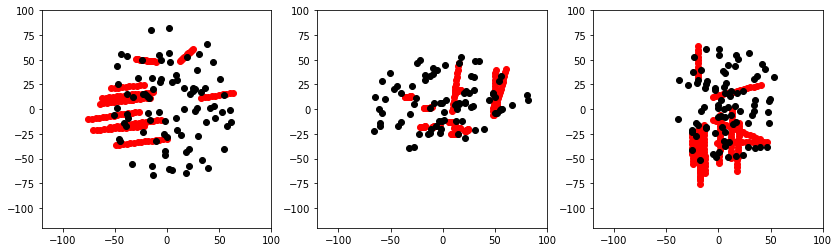

In [22]:
reg_xyz = loadtxt('centers.txt', usecols=(1,2,3))
reg_names = []
with open('centers.txt', 'r') as fd:
    #for line in fd.readlines():
     #   reg_names.append(line.strip().split()[0])
    for i, line in enumerate(fd.readlines()):
        reg_names.append('r%03d-%s' % (i, line.strip().split()[0]))
#seg = nibabel.load('aparcaseg_2_diff_2.nii.gz')
#reg_xyz = seg.affine.dot(c_[reg_xyz, ones((reg_xyz.shape[0], ))].T)[:3].T


seeg_labels = []
seeg_xyz = loadtxt('elecs_name.txt', usecols=(1,2,3))
with open('elecs_name.txt', 'r') as fd:
    for line in fd.readlines():
        parts = line.strip().split()
        seeg_labels.append(parts[0].upper())
#print sorted(seeg_labels+[e+str(i) for e, i in contacts])
monopolar_chan_to_pos = []
for name, idx in contacts:
    monopolar_chan_to_pos.append(seeg_labels.index(name+str(idx)))
seeg_xyz = array([seeg_xyz[i] for i in monopolar_chan_to_pos])

def _():
    x, y, z = zip(reg_xyz.T, seeg_xyz.T)
    for i, ((ra, sa), (rb, sb)) in enumerate([(x, y), (y, z), (z, x)]):
        subplot(1, 3, i + 1)
        plot(sa, sb, 'ro')
        plot(ra, rb, 'ko')
        axis([-120, 100, -120, 100])
        #xticks([]), yticks([])
figure(figsize=(14, 4))
_()
plt.show()

Now, we plot the centers (regions) and all the givn contacts of electrodes in 3D.

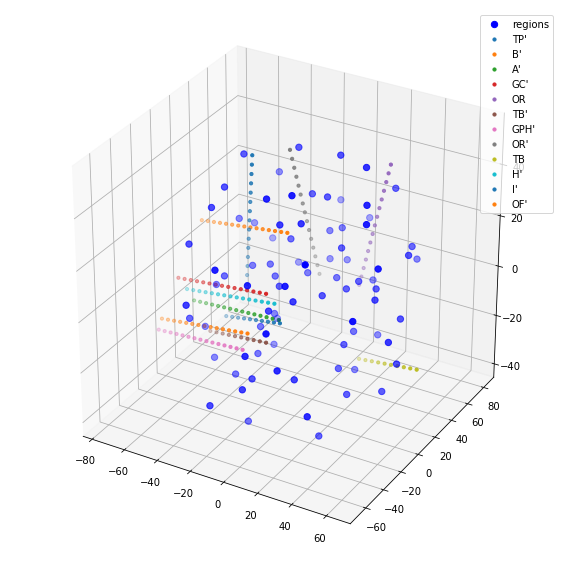

In [23]:
elecnames=[]
electrodes = {}  
with open('elecs_name.txt', 'r') as fd:
            for i, line in enumerate(fd.readlines()):
                line = line.strip()
                contact, x, y, z = line.split()
                elecnames.append(contact)
                name, _ = re.match("([A-Za-z]+[']*)([0-9]+)", contact).groups()
                if name in electrodes:
                    electrodes[name].append(i)
                else:
                    electrodes[name] = [i]
                    
        
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reg_xyz [:, 0], reg_xyz [:, 1], reg_xyz [:, 2], color='b', s=40, label='regions')
for name, idxs in electrodes.items():
    ax.scatter(seeg_xyz [idxs, 0], seeg_xyz [idxs, 1], seeg_xyz [idxs, 2], s=10, label=name)
    

plt.legend()
plt.tight_layout()
plt.show()    

# Load complex seizure

A complex seizure was recorded via the sEEG implantation of this patient (RB), at 1024 Hz. 
From head file "complex.ades" we get sampling Rate and number Of Samples, in addition to all the electode contacts.
We here load this dataset, parsing channel names to obtain the bipolar montage.

In [24]:
contacts = []
seeg_idxs = []
channel_idx = 0
contacts_labels = []

with open('complex.ades', 'r') as fd:
    for line in fd.readlines():
        parts = [p.strip() for p in line.strip().split('=')]
        if len(parts)>1 and parts[1] == 'SEEG':
            name, idx = re.match("([A-Za-z]+[']*)([0-9]+)", parts[0]).groups()
            idx = int(idx)
            contacts.append((name, idx))             
            seeg_idxs.append(channel_idx)
            contacts_labels.append(parts[0].upper())
            
            channel_idx += 1
 
    
bipnames = []
bipidx = []
for i in range(len(contacts)-1):
    (ln, li), (rn, ri) = contacts[i:i+2]
    if ln != rn:
        continue
    bipnames.append('%s%d-%d' % (ln, li, ri))
    bipidx.append((i, i+1))

In [25]:
print 'The number of contacts is ', channel_idx 
print 'The number of bi-polars is ', len(bipidx) 

The number of contacts is  165
The number of bi-polars is  153


Here, we extract samplingRate and numberOfSamples from complex.ades"

In [26]:
filename="complex.ades"

with open(filename, 'r') as fd:

            fd.readline() # ADES header file

            kw, sampling_rate = [s.strip() for s in fd.readline().strip().split('=')]
            assert kw == 'samplingRate'
            sampling_rate = float(sampling_rate)

            kw, nsamples = [s.strip() for s in fd.readline().strip().split('=')]
            assert kw == 'numberOfSamples'
            nsamples = int(nsamples)

In [27]:
print 'The sampling rate is ', sampling_rate 
print 'The number of samples is ', nsamples 

The sampling rate is  1024.0
The number of samples is  459776


Here, we compute time series according to sampling rate and number of samples as computed above.

In [28]:
t=np.linspace(0, (nsamples - 1)*(1./sampling_rate), nsamples)
delta_t=t[2001]-t[2000]

In [29]:
print  'The time increment dt is ', delta_t 

The time increment dt is  0.0009765625


# Plot time series

Here, we load the time series of all contacts from complex.npy

In [30]:
data=load('complex.npy')

In [31]:
print  'The shape of data is ', data.shape

The shape of data is  (170, 459776)


Here, we plot the raw time series.

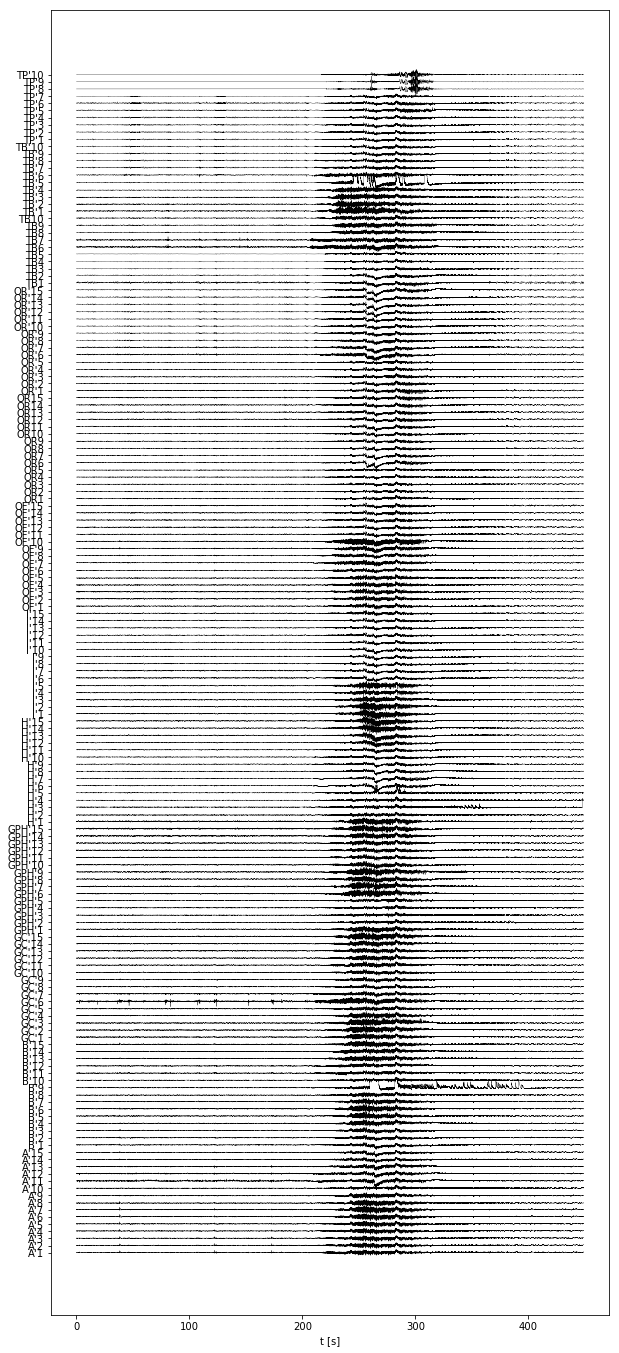

In [32]:
numberofcontacts=len(contacts)

plt.figure(figsize=(10, 24))

for i in range(numberofcontacts):
    plt.plot(t, 0.2e+3*data[i, :] + i, 'k', lw=0.3)
    
plt.xlabel("t [s]")
plt.yticks(np.r_[:numberofcontacts], [a + str(b) for a, b in contacts])
plt.show() 

In order to avoid getting NaN from raw time series, the last 200 indices are ignored. 
In addition, for clarifying the visualization, the amplitude of data is multiplied by a factor of 1e+6.  

In [33]:
seeg = 1e+6*data[:, :-200]

bip = array([seeg[i] - seeg[j] for i, j in bipidx])

In [34]:
print  'The shape of seeg data is ', seeg.shape
print  'The shape of bipolar is ', bip.shape

The shape of seeg data is  (170, 459576)
The shape of bipolar is  (153, 459576)


In [35]:
fs=sampling_rate  #fs = 1024.0
t = r_[:seeg.shape[1]]/fs

Here we plot the obtained bipolar montage (non-filtered bipolar).

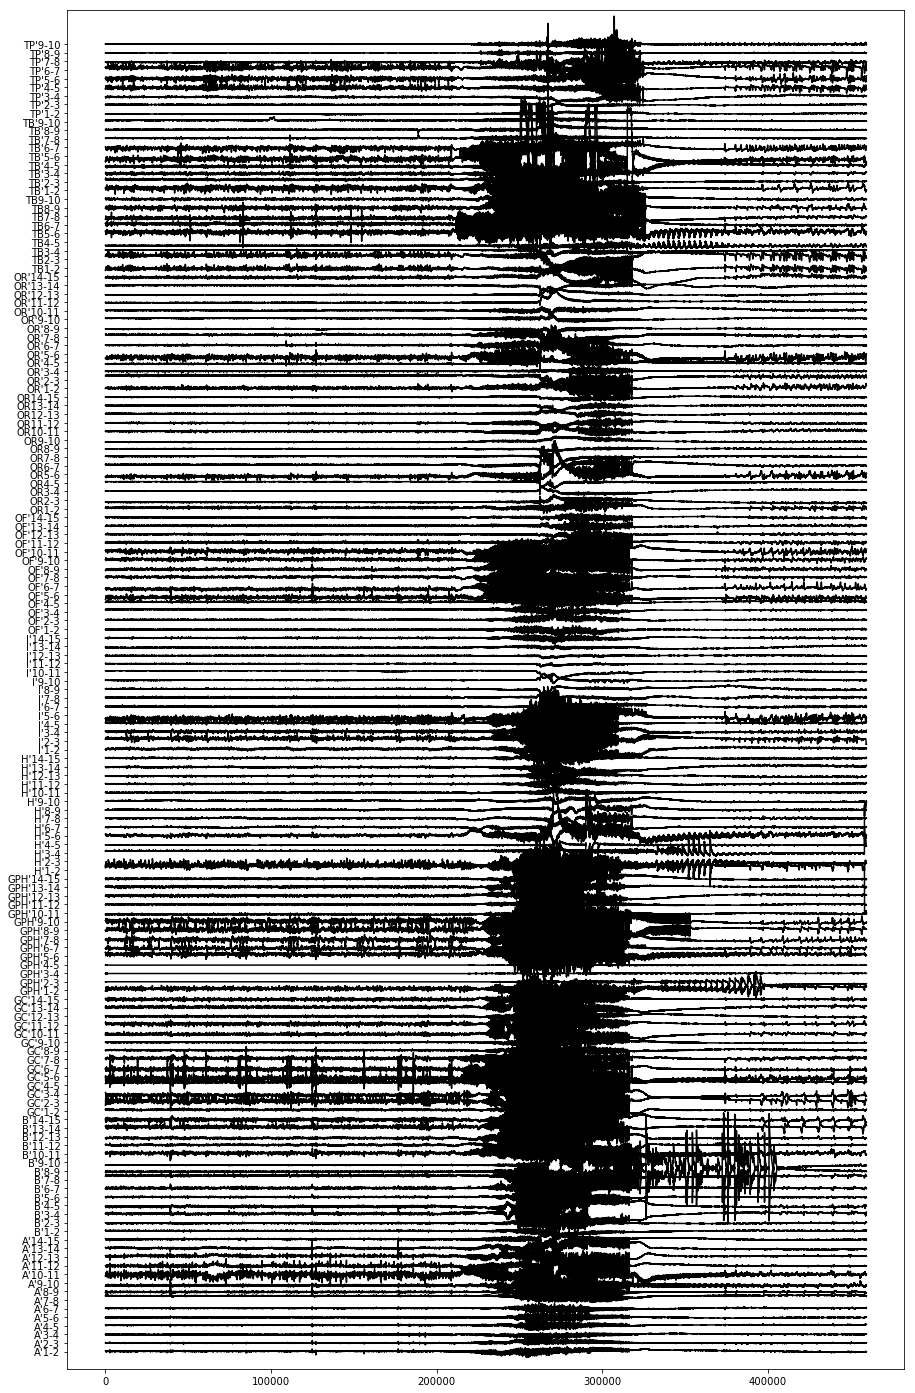

In [36]:
y=bip
figure(figsize=(15, 25))
for i, yi in enumerate(y):
    plot(yi*1e-3 + i, 'k')
yticks(r_[:bip.shape[0]], bipnames);
ylim([-2, bip.shape[0]+3]);
plt.show() 

As shown above, we have encountered a very large data set. To overcome the computational costs of such large data set (in both analyzing and fitting tasks), we first filter and then decimate the bipolar data.

# Filter & decimate

Here, we preprocess to select a frequency band of interest (2 - 15 Hz) & reduce the size of the data.

In [37]:
b, a = signal.butter(3, 4*r_[2, 15]/fs, 'pass')
y = signal.lfilter(b, a, bip, axis=1)
y = y[:, ::30] # decim ~ 30 Hz
t = t[::30]
t = (np.r_[:seeg.shape[1]]/fs)[::30]

fs = 1/(t[1] - t[0])

In [38]:
print 'The effective fs after decimation is %0.2f Hz' % (fs, )

The effective fs after decimation is 34.13 Hz


As shown below, we observe that the time series and corresponding bipolars reduced from 400,000 data points to 14,000 while the seizure signatures are preserved.

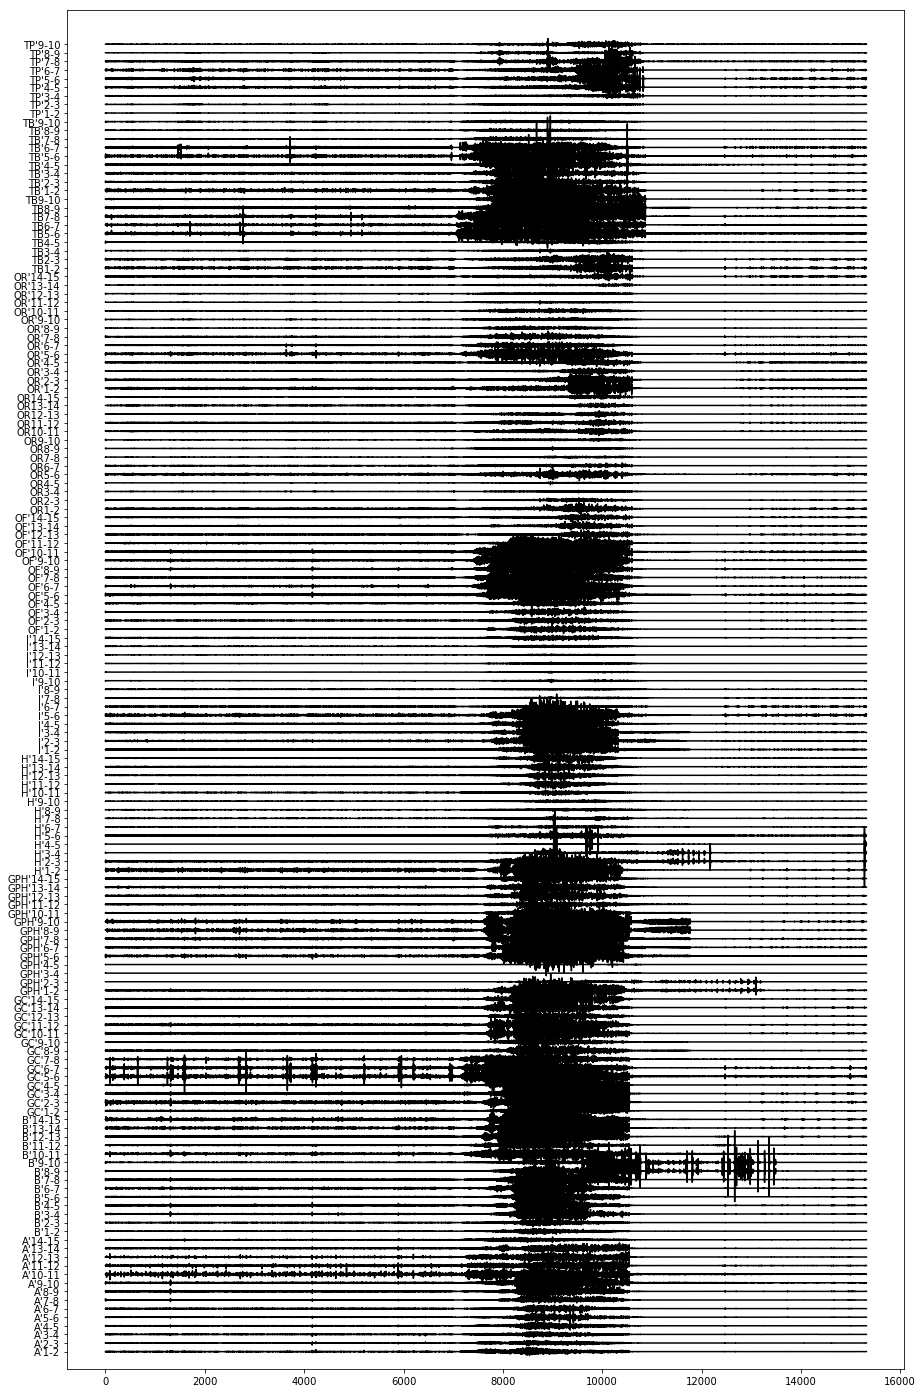

In [39]:
figure(figsize=(15, 25))
for i, yi in enumerate(y):
    plot(yi*1e-3 + i, 'k')
yticks(r_[:bip.shape[0]], bipnames);
ylim([-2, bip.shape[0]+3]);
plt.show() 


# Select Contacts

Up to now, we processed the raw time series of contacts, and the bipolars were filtered and decimated. Now, we need to select some the contacts for fitting task. Note that fitting more than 100 contacts, each time serie containg more that 14000 data points, is very computationally extensive. In addition, we are interested in seizure signatures which are observed in some of the contacts. This allows us to pick some of the channels according to their contribution in bipolar data. To this end, we use mean energy of differences in bipolars. In other words, 1-nt order differences along the bipolars are computed, squared (i.e., diff(bip, axis=1)**2) and then their mean values are sorted. 

Briefly, contacts are selected, which present greater high-frequency activity than their neighbors on the same electrode (Jirsa et al 2017).

Here, we use mean energy of diff to pick for instance 15 channels.

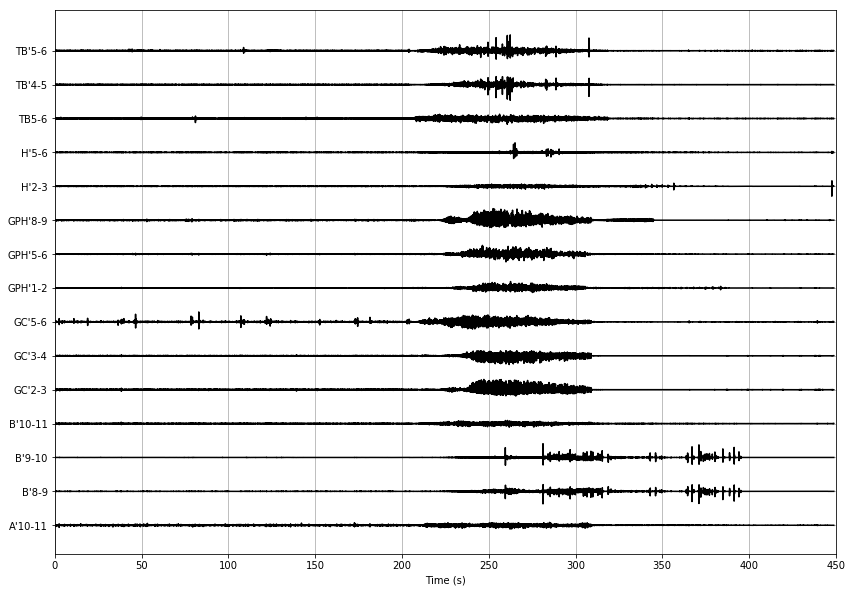

In [40]:
NumberofContacts=15

db2 = diff(bip, axis=1)**2
eni = argsort(mean(db2, axis=1))
eni = array(sort(eni[-NumberofContacts:]))


figure(figsize=(14, 10))
for i, yi in enumerate(y[eni]):
    plot(t, yi*1e-4 + i, 'k')
yticks(r_[:len(eni)], [bipnames[i] for i in eni]);
grid(True)
xlabel('Time (s)');
xlim([0, 450]);
plt.show() 

We can observe that still we can reduce the number of contacts. Here three bipolar electrodes are chosen.

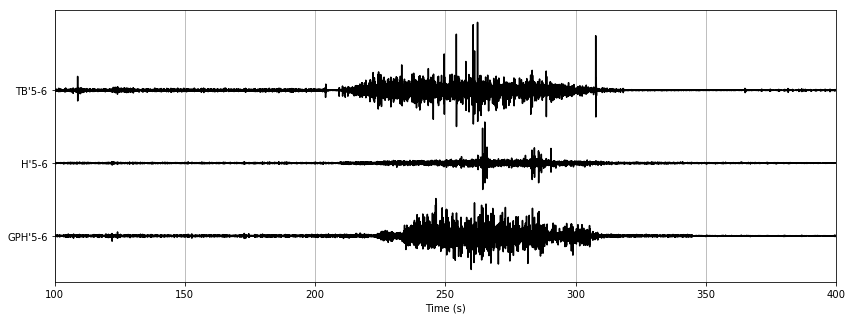

In [41]:
NumberofContacts=3

db2 = diff(bip, axis=1)**2
eni = argsort(mean(db2, axis=1))
eni = array(sort(eni[-NumberofContacts:]))
figure(figsize=(14, 5))
for i, yi in enumerate(y[eni]):
    plot(t, yi*2e-4 + i, 'k')
yticks(r_[:len(eni)], [bipnames[i] for i in eni]);
xlim([100, 400])
grid(True)
xlabel('Time (s)');
plt.show()

It can be observed that the seizure manifests between `t=100` & `t=400`, so we'll work only with that section.

In [42]:
tm = c_[t>100, t<400].all(axis=1)
savemat('complex.mat', {'t': t.astype('f'), 's': y.astype('f')})
!ls -lh complex.mat

-rw-r--rw-+ 1 meysamhashemi  staff   9.0M Sep 12 11:18 complex.mat


In [43]:
tm = c_[t>100, t<100.1].all(axis=1)
print 'section contains %d samples' % (tm.sum(), ) 

section contains 3 samples


# Select Nodes

As described above, we reduced the number of electrodes (i.e, observation as the target for fitting) by selecting some of the contacts according to the mean energy of bipolar. Moreover, we assume that few nodes in the whole brain network play a role in the seizure and thus contribute to the observed seizure. This allows us to reduce number of nodes in the network on which the inference is performed. Here, we select some of the nodes according to gain matrix information i.e., the network is reduced by selecting nodes with signifcant contribution to sEEG. Thereby, we first need to compute the gain matrix.

### Forward solution

Like other modalities, the SEEG measurements can be modeled using a forward solution that describes the contribution of each source dipole to each contact's measurement.

Our forward solution for sEEG is based on a dipole source model with dipoles at the centers of the regions used for connectivity estimation and the potential measured at contacts' positions. We first load the locations, then handle the contact locations.

While quantitatively better approximations to the forward solution are available in packages like OpenMEEG, we start with Sarvas 1987 Eq 12 describing the potential due to a point dipole in homogeneous space $V(\textbf{r}) = \frac{1}{4 \pi \sigma} \textbf{Q} \cdot \frac{\textbf{r}-\textbf{r}_0}{|\textbf{r}-\textbf{r}_0|^3}$. 

In [44]:
dr = reg_xyz - seeg_xyz[:, newaxis]
ndr = sqrt((dr**2).sum(axis=-1))
Vr = 1.0 / (4 * pi) / ndr**2
bVr = array([Vr[i] - Vr[j] for i, j in bipidx])

save('Vr.npy', Vr)

we set some default options for follwoing figures.

In [45]:
from matplotlib import rc
rc('lines', color='k')
rc('figure', figsize=(15, 5))
rc('image', cmap='binary', interpolation='nearest')
rc('patch', facecolor='k')
rc('axes', edgecolor='white')

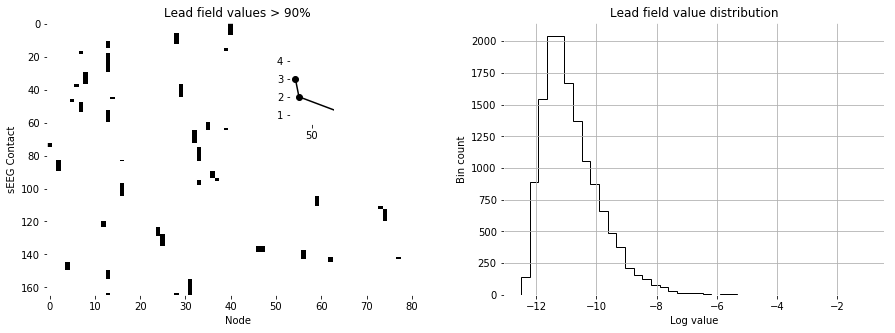

In [46]:
figure(figsize=(15, 5))
subplot(121)
nVr = Vr/Vr.max(axis=1)[:, newaxis] > 0.9
imshow(nVr, interpolation='nearest', aspect='auto')#, vmin=0.5, vmax=0.9)
title('Lead field values > 90%'), xlabel('Node'), ylabel('sEEG Contact')
a = axes([.35, .6, .04, .2])
n = bincount(nVr.sum(axis=1))
plot(n[1:], r_[1:len(n)], 'ko-')
yticks([1, 2, 3, 4]), xticks([50]), ylim([0.5, 4.5]), xlim([-10, 110])
subplot(122), hist(log(Vr).reshape((-1,)), 40, color='k', histtype='step'), grid(1);
title('Lead field value distribution'), xlabel('Log value'), ylabel('Bin count');
plt.show()

We will allow $\sigma$ to vary during inference, and thus drop it from the lead field calculation. Finally, for lack of high resolution in spatial geometry, the orientations of the sources are largely unknown and thus ignored. To make the correspondence between contacts and nodes clearer, the lead field is normalized by maximum per row and thresholded at 90%, and the inset shows a histogram of nodes (y-axis) exceeded the 90% threshold for contacts (x-axis).
 
For the current purposes, we asssume that few nodes in the whole brain network play a role in the seizure and thus contribute to the observed seizure. This allows us to reduce the number of electrodes and number of nodes in the network on which the inference is performed.

In [47]:
actnodes = []
Ps=[]
for i in eni:
    ii = bipidx[i]
    ni = find(nVr[ii[0]:ii[1]+1].any(axis=0))
    print("%15s %45s" % (bipnames[i], ', '.join([reg_names[j] for j in ni])))
    Ps.append(i)
    actnodes += ni.tolist()
actnodes = unique(actnodes)


print "The selected Nodes are : ", actnodes
print "The selected contacts are : ", Ps

        GPH'5-6                  r007-ctx-lh-inferiortemporal
          H'5-6 r032-ctx-lh-transversetemporal, r035-Left-Thalamus-Proper, r039-Left-Hippocampus
         TB'5-6 r004-ctx-lh-entorhinal, r013-ctx-lh-middletemporal
The selected Nodes are :  [ 4  7 13 32 35 39]
The selected contacts are :  [46, 60, 139]


Here, for the six bipolar electrodes chosen, a total of eight regions are implicated.

### Connectivity

Fiber tracking from grey-white matter boundaries performed on DTI, along with the chosen parcellation, generates a "weight" matrix out of fiber counts. To reduce symmetry breaking in the dynamics, this connectivity is normalized with respect to its afferents.

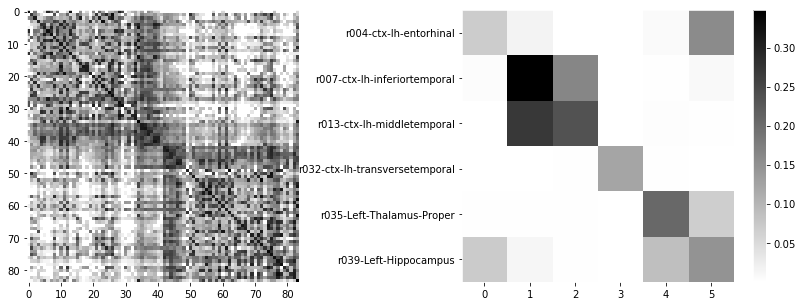

In [48]:
K_raw = loadtxt('weights.txt')
K = K_raw * 1.0 / K_raw.sum(axis=1)[:, newaxis]
subplot(121)
imshow(log(K+1e-5), interpolation='nearest')

subplot(122)

imshow(K[actnodes][:, actnodes])
yticks(r_[:len(actnodes)], [reg_names[i] for i in actnodes]);
colorbar();
plt.show()

# Fitting target

we use an observation model that incorporates the sEEG forward solution described above, under the assumption that the x1 variable describes fluctuations in the log power of high frequency activity, predicting sensor log power, with normally distributed observation error.

The sEEG data are windowed and Fourier transformed to obtain estimates of their spectral density over time. Then sEEG power above 10 Hz is summed to capture the temporal variation of the fast activity. These time series are corrected to a preictal baseline, log-transformed and linearly detrended over the time window encompassing the seizure.

In [49]:
from numpy import load, array, log
from pylab import specgram, ion, ioff, detrend_linear

from matplotlib import rc
rc('lines', color='k')
rc('patch', facecolor='k')
rc('axes', edgecolor='Black')

In [50]:
def log_power_change(fs, seeg, flo=10.0, nfft=1024, tb=10.0):  
    ioff()
    ps = []
    for chan in seeg:
        P, F, T, _ = specgram(chan, NFFT=nfft, Fs=fs) 
        p = P[F>flo].sum(axis=0)
        p /= p[T<tb].mean()
        ps.append(detrend_linear(log(p)))
    return T, array(ps)

In [51]:
def load_complex():
    return load('complex.npy')

seeg = 1e+6*load_complex()
fs=1024

In [52]:
T, ps = log_power_change(fs, seeg, nfft=1024)
plt.close()

/Users/meysamhashemi/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/Users/meysamhashemi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/Users/meysamhashemi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


In [53]:
T -= T[0]
dt = T[1] - T[0]

In [54]:
picks = asarray(Ps)

print "The slected contacts (picks) are: ", picks

The slected contacts (picks) are:  [ 46  60 139]


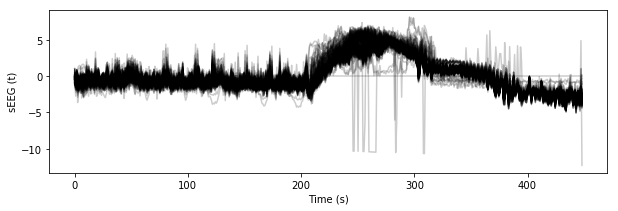

In [55]:
figure(figsize=(10, 3))
plot(T, ps.T, 'k', alpha=0.2)
ylabel('sEEG (t)');
xlabel('Time (s)');
plt.show()

In [65]:
nodes=list(actnodes)
print "The slected nodes are: ", actnodes

The slected nodes are:  [ 4  7 13 32 35 39]


 It is arbitrary to add more specific nodes according to clinical information. For instance, in Proix et al Brain 2016, the Epileptic and Propagation Zones are provided. EZ=[4, 5, 31, 39, 40, 53],  PZ=[6, 13, 14, 27, 33]. One can add them to the above obtained selected nodes


In [66]:
Ezlist=[ "ctx-lh-entorhinal", "Left-Amygdala", "Left-Hippocampus", "ctx-lh-fusiform", "ctx-lh-temporalpole", "ctx-rh-entorhinal" ]
Pzlist=[ "ctx-lh-superiorparietal", "ctx-lh-middletemporal", "ctx-lh-inferiorparietal", "ctx-lh-insula", "ctx-lh-parahippocampal" ]
 

reg_names = []
with open('centers.txt', 'r') as fd:
    for i, line in enumerate(fd.readlines()):
        reg_names.append(( line.strip().split()[0]))
        


Ez_indices = [reg_names.index(c) for c in Ezlist]
Pz_indices = [reg_names.index(c) for c in Pzlist]


Ez = np.asarray(Ez_indices,dtype=float)   
Pz = np.asarray(Pz_indices,dtype=float)

In [67]:
print "The Ez list according to clinician is: ", Ezlist
print "The Pz  list according to clinician is: ",Pzlist

print "The indices of Ez are: ", Ez_indices
print  "The indices of Pz are: ", Pz_indices

#nodes.extend(Ez_indices)
#nodes.extend(Pz_indices)

print  "The pre-selected nodes are: ", nodes

The Ez list according to clinician is:  ['ctx-lh-entorhinal', 'Left-Amygdala', 'Left-Hippocampus', 'ctx-lh-fusiform', 'ctx-lh-temporalpole', 'ctx-rh-entorhinal']
The Pz  list according to clinician is:  ['ctx-lh-superiorparietal', 'ctx-lh-middletemporal', 'ctx-lh-inferiorparietal', 'ctx-lh-insula', 'ctx-lh-parahippocampal']
The indices of Ez are:  [4, 40, 39, 5, 31, 53]
The indices of Pz are:  [27, 13, 6, 33, 14]
The pre-selected nodes are:  [4, 7, 13, 32, 35, 39]


Contacts are selected, which present greater high-frequency activity than their neighbors on the same electrode. Given that, contrary to M/EEG, the sEEG lead field is very sparse, three nodes per contact are used in the network model. Other nodes are not recruited and rest at their fixed points

In [68]:
for i in picks:
    _ = argsort(Vr[i])[-3:].tolist()
    nodes += _
    print("%r picks %r" % (bipnames[i], [reg_names[ii] for ii in _]))
nodes = unique(nodes)   

"GPH'5-6" picks ['Left-Hippocampus', 'ctx-lh-parahippocampal', 'ctx-lh-fusiform']
"H'5-6" picks ['Left-Hippocampus', 'ctx-lh-isthmuscingulate', 'Left-Thalamus-Proper']
"TB'5-6" picks ['ctx-rh-middletemporal', 'ctx-rh-superiortemporal', 'ctx-rh-inferiortemporal']


In [69]:
print "The final selected nodes are: ", nodes

The final selected nodes are:  [ 4  5  7  8 13 14 32 35 39 56 62 77]


In [70]:
print([reg_names[i] for i in unique(nodes)])

['ctx-lh-entorhinal', 'ctx-lh-fusiform', 'ctx-lh-inferiortemporal', 'ctx-lh-isthmuscingulate', 'ctx-lh-middletemporal', 'ctx-lh-parahippocampal', 'ctx-lh-transversetemporal', 'Left-Thalamus-Proper', 'Left-Hippocampus', 'ctx-rh-inferiortemporal', 'ctx-rh-middletemporal', 'ctx-rh-superiortemporal']


Then, according to selected contacts and nodes, the gain matrix is reduced to corresponding dimension. If we have N contacts and M nodes, the dimension of gain matrix is N $\times$ M.

In [71]:
Vr_ = Vr[picks][:, nodes]
Vr_ /= Vr_.sum(axis=1)[:, newaxis]
print 'reduced gain matrix shape is ', Vr_.shape 

reduced gain matrix shape is  (3, 12)


The connectivity matrix should also be reduced according to the selected nodes.

In [72]:
W = loadtxt('weights.txt')
iconst = setxor1d(r_[:W.shape[0]], nodes)
for i in range(W.shape[0]):
    W[i, i] = 0.0
W /= W.max()
W_ = W[nodes][:, nodes]
Ic = W[nodes][:, iconst].sum(axis=1)

In [73]:
tm = c_[T>100.0, T<450.0].all(axis=1)
T = T[tm]
print 'ps  shape is ', ps.shape 
ps = ps[picks][:, tm]
print 'ps shape now is ', ps.shape 

ps  shape is  (170, 513)
ps shape now is  (3, 398)


Finally here is the fitting target:

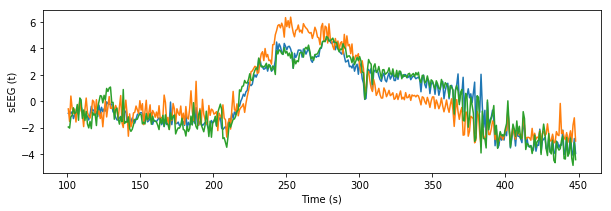

In [74]:
figure(figsize=(10, 3))
for i in range(0, len(ps)):
    plot(T, ps[i,:])
ylabel('sEEG (t)');
xlabel('Time (s)');
plt.show()

The following code, generates the "data.R" for running Stan Bayesian inference.

In [75]:
data_dict = {
    'nn': W_.shape[0], 'ns': Vr_.shape[0], 'nt': len(T),
    'I1': 3.1, 'tau0': 3.0, 'dt': dt,
    'SC': W_, 'SC_var': 5.0, 'gain': Vr_, 'seeg_log_power': ps.T, 'Ic': Ic,
    'K_lo': 1.0, 'K_u': 5.0, 'K_v': 10.0,
    'x0_lo': -4.0, 'x0_hi': -1.0, 'x0c': -2.05, 'deltax0': 0.4,
    'eps_hi': 0.25, 'sig_hi': 0.025,
    'zlim': r_[0.0, 10.0],
}

In [76]:
npz = {'nodes': nodes}
npz.update(data_dict)
np.savez('data.R.npz', **npz)

In [77]:
#%run Rdump.py
from Rdump import stan_rdump

In [78]:
stan_rdump(data_dict, 'data.R')

In [79]:
!ls -lh data.R

-rw-r--rw-+ 1 meysamhashemi  staff    22K Sep 12 11:23 data.R


# Compile and Run

Here we need to translating Stan model to C++ code. 

In [49]:
path = '/Users/meysamhashemi/Work/Code/PostdocCode/BayesianPython/FittingSEEG/FittingWorkflowRB/'

and using make command, we compile the Stan code written in vep.stan to C++ code.

In [52]:
tic = time.time()

! cd $path/cmdstan && make ../vep

print(time.time() - tic, 'second is required to compile')


--- Translating Stan model to C++ code ---
bin/stanc  ../vep.stan --o=../vep.hpp
Model name=vep_model
Input file=../vep.stan
Output file=../vep.hpp
DIAGNOSTIC(S) FROM PARSER:
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = inste

# Run

Uninformative priors are placed on the hidden states' initial conditions, while their evolution follows a Euler-Maruyama discretization of the corresponding stochastic differential equations with linear additive normally distributed noise. Uninformative priors are also placed on the excitability parameter per node x0 observation baseline power, scale and noise.  Structural connectivity specifies a gamma prior on the connectivity used in the generative method.  


This model is implemented using Stan, a software for Bayesian inference, which implements both Hamiltonian Monte-Carlo and automatic variational inference algorithms for generic differential probability models (The Stan Development Team, 2015). 


To run Variational Inference for 10000 iterations use the following command:

./vep variational  iter=10000 tol_rel_obj=0.001  data file=data.R output file=output.csv


To run HMC for 10000 iterations use the following command:

./vep sample  num_samples=10000 tol_rel_obj=0.001  data file=data.R output file=output.csv

In [53]:
tic = time.time()

!./vep variational  iter=10000 tol_rel_obj=0.001  data file=data.R output file=output.csv

print(time.time() - tic, 'second is required to run')

method = variational
  variational
    algorithm = meanfield (Default)
      meanfield
    iter = 10000 (Default)
    grad_samples = 1 (Default)
    elbo_samples = 100 (Default)
    eta = 1 (Default)
    adapt
      engaged = 1 (Default)
      iter = 50 (Default)
    tol_rel_obj = 0.001
    eval_elbo = 100 (Default)
    output_samples = 1000 (Default)
id = 0 (Default)
data
  file = data.R
init = 2 (Default)
random
  seed = 1565920547
output
  file = output.csv (Default)
  diagnostic_file =  (Default)
  refresh = 100 (Default)

------------------------------------------------------------
EXPERIMENTAL ALGORITHM:
  This procedure has not been thoroughly tested and may be unstable
  or buggy. The interface is subject to change.
------------------------------------------------------------



Gradient evaluation took 0.037663 seconds
1000 transitions using 10 leapfrog steps per transition would take 376.63 seconds.
Adjust your expectations accordingly!


Begin eta adaptation.
Iteration:   1 

# Results

(A) shows the true time course in solid black of high-frequency power of two SEEG channels. Shown in blue is the predicted SEEG power based estimates of hidden states to which the observation model is applied, shaded to cover
5th to 95th percentiles. (B) Violin plots of the estimated densities of the x0 parameter
for nodes included in the analysis. Region names' abbreviations are also provided below. All the results are saved in "report.txt".

LSE is 84.3838669119
CLE r004 ctx lh entorhinal
CLF r005 ctx lh fusiform
CLI r007 ctx lh inferiortemporal
CLI r008 ctx lh isthmuscingulate
CLM r013 ctx lh middletemporal
CLP r014 ctx lh parahippocampal
CLT r032 ctx lh transversetemporal
LTP r035 Left Thalamus Proper
LH r039 Left Hippocampus
CRI r056 ctx rh inferiortemporal
CRM r062 ctx rh middletemporal
CRS r077 ctx rh superiortemporal
The indices of common nodes are:  [4.0, 5.0, 39.0, 13.0, 14.0]
The corectly predicted common nodes are:  [[4.0, -1.5842424875124874, 'Ez'], [13.0, -2.0002072127872128, 'Pz'], [39.0, -1.2163652847152848, 'Ez']]
The indices of corectly predicted EZ are:  [4, 39]
The indices of corectly predicted Pz are:  [13]
The Predective Score is 3  out of 5  common nodes
The Predective Ez are:
CLE r004 ctx lh entorhinal
LH r039 Left Hippocampus
The Predective Pz are:
CLM r013 ctx lh middletemporal


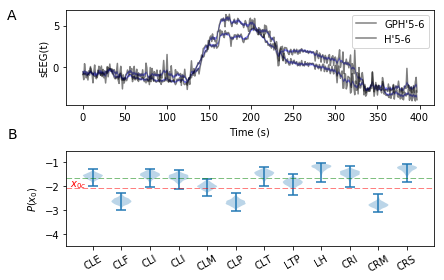

In [80]:
run  report.py output.csv

Here the fitting is evaluated using two defined metric namely Predictive Score and Least Square Error (LSE). Predictive Score indicates that how many of the nodes are correctly predicted according to the clinical information. And LSE indicate the error between emperical and fitted signal. Higher value of Predictive Score and lower value of LSE indicate a better fitting. 

## Distributions of excitability (Brain Space Maping)

The follwoing plot illistrates the distributions of excitability as as found by the data fitting. Color bar: prediction of EZ (in yellow) and PZ (in red)


This figure can be produced by Mrtrix using the following line of codes in terminal:

mrconvert label.mif label.nii.gz

python generatex0.py label.nii.gz reportx0.txt x0.nii.gz sigmax0.nii.gz
./BSM.sh



To get a brain space mapping result more closer to clinical observations, we can constrain some of the nodes to obey EZ or PZ according to clinician. In other words, we can narrow the prior distributions for the selected EZ according to clinical information.  